# **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# **Import the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


# **Read the dataset**

In [ ]:
df = pd.read_csv('/content/Thyroid.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examin,Adenopathy,Pathology,Focality,Risk,Tumor Class,Nodal Class,Metastasis Class,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# **Data Inspection and Exploration**

In [ ]:
df.duplicated().sum()

np.int64(19)

In [ ]:
# Dropping duplicated rows
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               364 non-null    int64 
 1   Gender            364 non-null    object
 2   Smoking           364 non-null    object
 3   Hx Smoking        364 non-null    object
 4   Hx Radiothreapy   364 non-null    object
 5   Thyroid Function  364 non-null    object
 6   Physical Examin   364 non-null    object
 7   Adenopathy        364 non-null    object
 8   Pathology         364 non-null    object
 9   Focality          364 non-null    object
 10  Risk              364 non-null    object
 11  Tumor Class       364 non-null    object
 12  Nodal Class       364 non-null    object
 13  Metastasis Class  364 non-null    object
 14  Stage             364 non-null    object
 15  Response          364 non-null    object
 16  Recurred          364 non-null    object
dtypes: int64(1), object(1

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examin,0
Adenopathy,0
Pathology,0
Focality,0


In [ ]:
df.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


# **Removal of all Unwanted Observations**

In [ ]:
# Drop Unwanted Columns
col_to_drop = ['Name', 'Email']
df = df.drop(columns=[col for col in col_to_drop if col in df.columns], errors='ignore')
df.shape

(364, 17)

In [ ]:
# Rounding off values
round((df.isnull().sum()/df.shape[0])*100,2)

,0
Age,0.0
Gender,0.0
Smoking,0.0
Hx Smoking,0.0
Hx Radiothreapy,0.0
Thyroid Function,0.0
Physical Examin,0.0
Adenopathy,0.0
Pathology,0.0
Focality,0.0


In [ ]:
# Drop Unwanted Rows
df.dropna(inplace=True)
df.shape

(364, 17)

# **Check the Categorical and Numerical Columns**

In [ ]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns:',cat_col)

# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns:',num_col)

Categorical columns: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examin', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Tumor Class', 'Nodal Class', 'Metastasis Class', 'Stage', 'Response', 'Recurred']
Numerical columns: ['Age']


In [ ]:
df[cat_col].nunique()

,0
Gender,2
Smoking,2
Hx Smoking,2
Hx Radiothreapy,2
Thyroid Function,5
Physical Examin,5
Adenopathy,6
Pathology,4
Focality,2
Risk,3


# **Handle categorical variables (one-hot encoding, label encoding)**

In [ ]:
# @title **Label Encoding**

le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examin,Adenopathy,Pathology,Focality,Risk,Tumor Class,Nodal Class,Metastasis Class,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [ ]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns:',cat_col)

# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns:',num_col)

Categorical columns: []
Numerical columns: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examin', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Tumor Class', 'Nodal Class', 'Metastasis Class', 'Stage', 'Response', 'Recurred']


# **Perform Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics
df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examin,Adenopathy,Pathology,Focality,Risk,Tumor Class,Nodal Class,Metastasis Class,Stage,Response,Recurred
count,364.00000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,41.25000,0.195055,0.134615,0.076923,0.019231,1.947802,2.530220,2.920330,2.535714,0.626374,1.543956,2.241758,0.571429,0.049451,0.255495,1.604396,0.296703
std,15.31436,0.396788,0.341782,0.266836,0.137524,0.647113,1.344991,1.202259,0.906870,0.484432,0.651966,1.359312,0.870614,0.217105,0.791203,0.931590,0.457433
min,15.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,52.00000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.250000,1.000000
max,82.00000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000


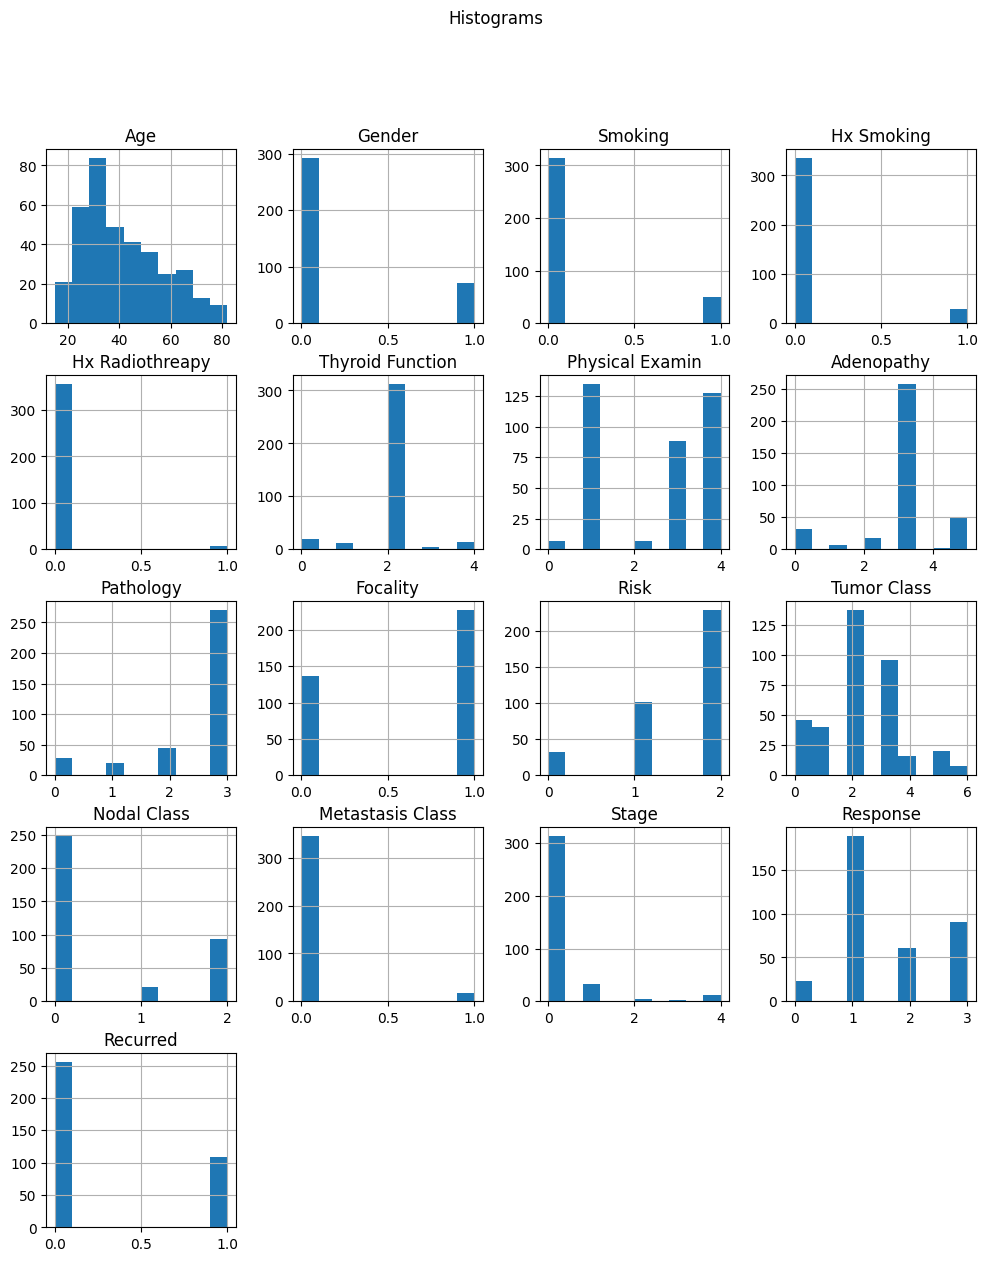

In [ ]:
# @title **Data distributions (histograms, box plots)**

# Histogram
df[num_col].hist(figsize=(12, 14))
plt.suptitle("Histograms")
plt.show()

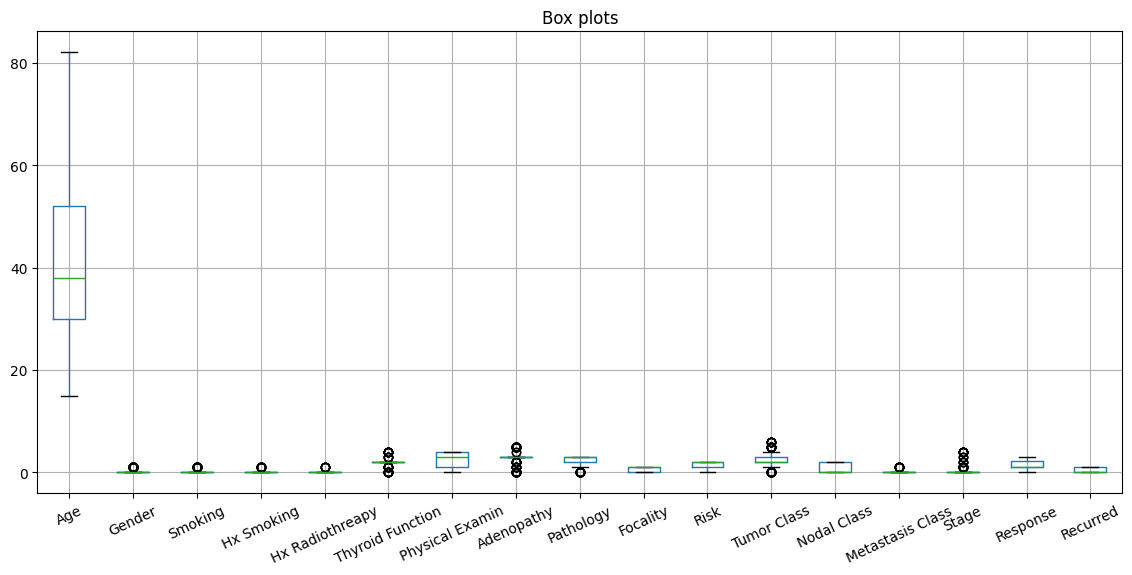

In [ ]:
# Box Plot
df[num_col].boxplot(figsize=(14, 6))
plt.title("Box plots")
plt.xticks(rotation=25)
plt.show()

In [ ]:
# @title **Drop the Outliers**

# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    for col in df[num_col]:
        Q1 = df[col].quantile(0.1)
        Q3 = df[col].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from all numeric columns
df = remove_outliers_iqr(df)

df.info()

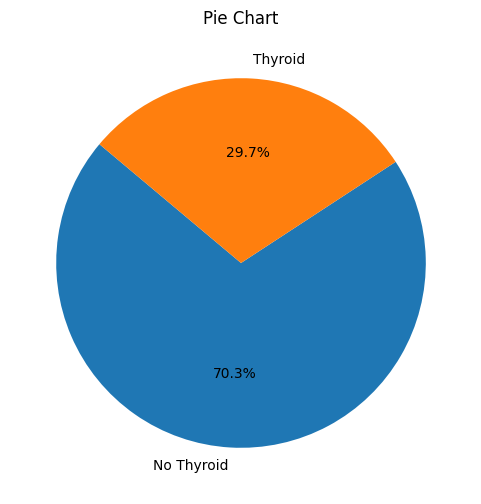

In [ ]:
# @title **Check Outcomes Proportionality**

#Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df["Recurred"].value_counts(), labels= ['No Thyroid', 'Thyroid'] , autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.show()

In [1]:
# @title **K-Means clustering**

k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# @title **Correlation Matrix**

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Feature Selection Techniques**

In [ ]:
# @title **Standardize Numerical Features**

# Standard Scaler
num_features = [col for col in num_col if col != "Recurred"]

scaler = StandardScaler()
df[num_features] = np.round(scaler.fit_transform(df[num_features]), 2)

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examin,Adenopathy,Pathology,Focality,Risk,Tumor Class,Nodal Class,Metastasis Class,Stage,Response,Recurred
0,-0.93,-0.49,-0.39,-0.29,-0.14,0.08,0.35,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,0.43,0
1,-0.47,-0.49,-0.39,3.46,-0.14,0.08,-1.14,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
2,-0.74,-0.49,-0.39,-0.29,-0.14,0.08,1.09,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
3,1.36,-0.49,-0.39,-0.29,-0.14,0.08,1.09,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
4,1.36,-0.49,-0.39,-0.29,-0.14,0.08,-1.14,0.07,-0.59,-1.29,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0


In [ ]:
# @title **Standardize Numerical Features**

# MinMax Scaler
num_features = [col for col in num_col if col != "Recurred"]

scaler = MinMaxScaler()
df[num_features] = np.round(scaler.fit_transform(df[num_features]), 2)

df.head()

In [ ]:
# @title **Identify and remove highly correlated features**

corr_matrix = df.corr().abs()
to_drop = []
for col in corr_matrix.columns:
    if col != "Recurred":  # Keep Recurred Column
        if any(corr_matrix[col] > 0.85):
            to_drop.append(col)
print(to_drop)
# As all cols will get dropped we are skipping this step for now

# Drop correlated features
#df = df.drop(columns=to_drop)
#df.shape

['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examin', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Tumor Class', 'Nodal Class', 'Metastasis Class', 'Stage', 'Response']


In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examin,Adenopathy,Pathology,Focality,Risk,Tumor Class,Nodal Class,Metastasis Class,Stage,Response,Recurred
0,-0.93,-0.49,-0.39,-0.29,-0.14,0.08,0.35,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,0.43,0
1,-0.47,-0.49,-0.39,3.46,-0.14,0.08,-1.14,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
2,-0.74,-0.49,-0.39,-0.29,-0.14,0.08,1.09,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
3,1.36,-0.49,-0.39,-0.29,-0.14,0.08,1.09,0.07,-0.59,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
4,1.36,-0.49,-0.39,-0.29,-0.14,0.08,-1.14,0.07,-0.59,-1.29,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0


In [ ]:
# @title **Apply feature selection techniques (e.g., SelectKBest, Mutual Information)**

X = df.drop(columns=["Recurred"])
y = df["Recurred"]

# Select top 15 best features
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

# Update dataframe with selected features + Recurred
df = df[selected_features.tolist() + ["Recurred"]]
print("Shape after feature selection:", df.shape)

Selected Features: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examin', 'Adenopathy', 'Focality', 'Risk', 'Tumor Class', 'Nodal Class', 'Metastasis Class', 'Stage', 'Response']
Shape after feature selection: (364, 16)


In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examin,Adenopathy,Focality,Risk,Tumor Class,Nodal Class,Metastasis Class,Stage,Response,Recurred
0,-0.93,-0.49,-0.39,-0.29,-0.14,0.08,0.35,0.07,0.77,0.7,-1.65,-0.66,-0.23,-0.32,0.43,0
1,-0.47,-0.49,-0.39,3.46,-0.14,0.08,-1.14,0.07,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
2,-0.74,-0.49,-0.39,-0.29,-0.14,0.08,1.09,0.07,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
3,1.36,-0.49,-0.39,-0.29,-0.14,0.08,1.09,0.07,0.77,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0
4,1.36,-0.49,-0.39,-0.29,-0.14,0.08,-1.14,0.07,-1.29,0.7,-1.65,-0.66,-0.23,-0.32,-0.65,0


# **Split the dataset into training and testing sets (80-20 or 70-30 split)**

In [ ]:
X = df.drop(columns=["Recurred"])
y = df["Recurred"]

# 80% training - 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

Training Set: (291, 15)
Testing Set: (73, 15)


# **Train at least two models**

Decision Tree Model Accuracy: 0.9178082191780822

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.81      0.95      0.88        22

    accuracy                           0.92        73
   macro avg       0.89      0.93      0.91        73
weighted avg       0.93      0.92      0.92        73



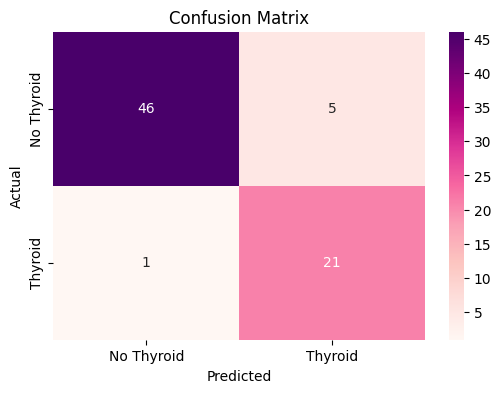

In [ ]:
# @title **Decision Tree Model**

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=["No Thyroid", "Thyroid"], yticklabels=["No Thyroid", "Thyroid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Random Forest Model Accuracy: 0.9726027397260274

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.95      0.95      0.95        22

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



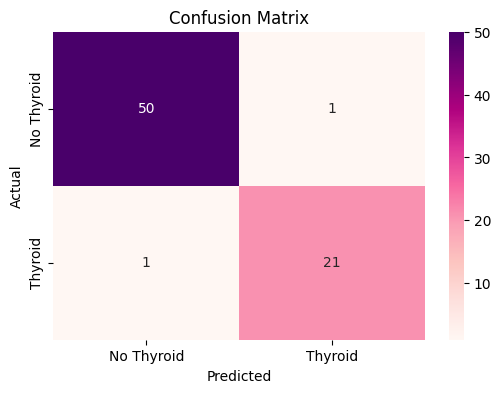

In [ ]:
# @title **Random Forest Model**

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=["No Thyroid", "Thyroid"], yticklabels=["No Thyroid", "Thyroid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

K-Nearest Neighbors Model Accuracy: 0.8493150684931506

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        51
           1       0.82      0.64      0.72        22

    accuracy                           0.85        73
   macro avg       0.84      0.79      0.81        73
weighted avg       0.85      0.85      0.84        73



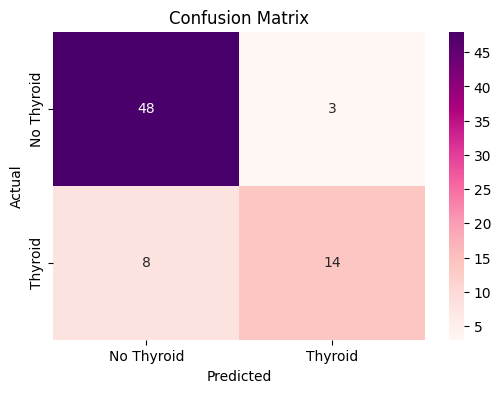

In [ ]:
# @title **K-Nearest Neighbors Model (KNN)**

# Initialize and train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate model
print("K-Nearest Neighbors Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=["No Thyroid", "Thyroid"], yticklabels=["No Thyroid", "Thyroid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Support Vector Machine Model Accuracy: 0.9041095890410958

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.86      0.82      0.84        22

    accuracy                           0.90        73
   macro avg       0.89      0.88      0.88        73
weighted avg       0.90      0.90      0.90        73



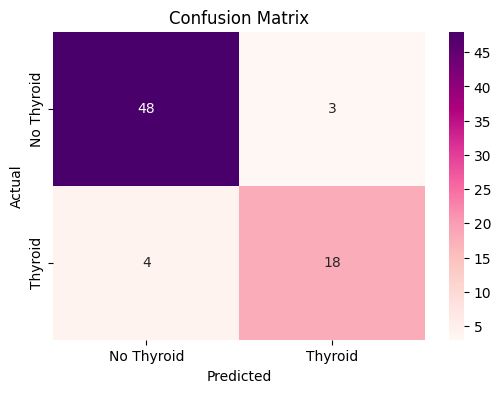

In [ ]:
# @title **Support Vector Machine Model (SVM)**

# Initialize and train Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
print("Support Vector Machine Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=["No Thyroid", "Thyroid"], yticklabels=["No Thyroid", "Thyroid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Logistic Regression Model Accuracy: 0.8493150684931506

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.79      0.68      0.73        22

    accuracy                           0.85        73
   macro avg       0.83      0.80      0.81        73
weighted avg       0.85      0.85      0.85        73



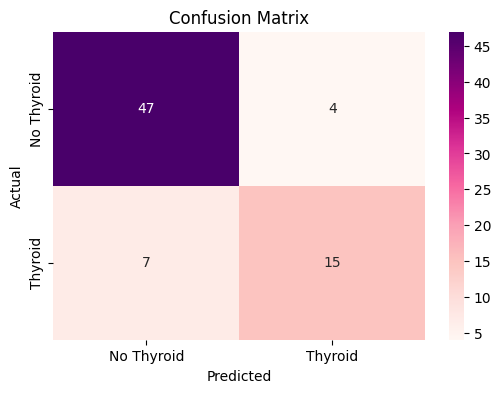

In [ ]:
# @title **Logistic Regression Model**

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate model
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=["No Thyroid", "Thyroid"], yticklabels=["No Thyroid", "Thyroid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# @title **Linear Regression Model**

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate model using regression metrics
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 0.08890371260138882
R-squared (R²) Score: 0.5777469835536533


In [ ]:
# @title **Tune Decision Tree Using GridSearchCV**

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, verbose=2, n_jobs=-1)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on test set
y_pred_rf_grid = best_rf_model.predict(X_test)

# Evaluate model
print("GridSearchCV Best Parameters:", grid_search.best_params_)
print("GridSearchCV Best Score:", grid_search.best_score_)
print("GridSearchCV Test Accuracy:", accuracy_score(y_test, y_pred_rf_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_grid))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_grid)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=["No Thyroid", "Thyroid"], yticklabels=["No Thyroid", "Thyroid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GridSearchCV Confusion Matrix")
plt.show()

In [ ]:
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:


ValueError: Found input variables with inconsistent numbers of samples: [200, 73]